# Theresholding

![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

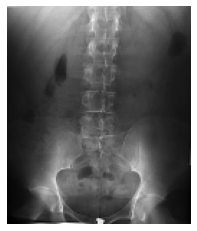

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()


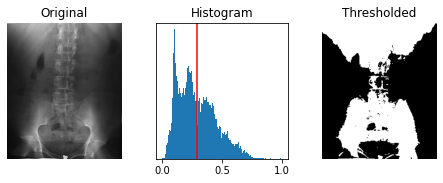

In [ ]:
#binary thresholding
image = im
thresh = np.mean(image)
binary = np.where(image > thresh, 255,0)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')


ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].set_yticks([])
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

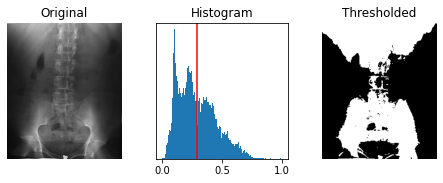

In [ ]:
# thresholding to zero
image = im
thresh = np.mean(image)
binary = np.where(image > thresh, thresh,0)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].set_yticks([])
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

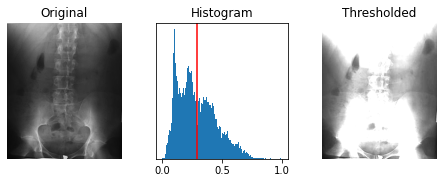

In [ ]:
# truncated threshold
image = im
thresh = np.mean(image)
binary = np.where(image > thresh, thresh,image)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].set_yticks([])
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

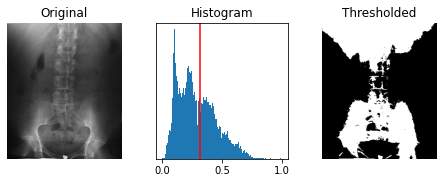

In [ ]:
from skimage.filters import threshold_otsu
#otsu's thresholding

image = im
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].set_yticks([])
ax[1].axvline(thresh, color='r')


ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


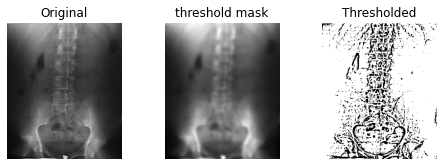

In [ ]:
#adaptative thresholding
from skimage.filters import threshold_otsu, threshold_local
image = im
block_size = 15
local_thresh = threshold_local(image, block_size, offset =0.01)
binary_local = image > local_thresh


fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(local_thresh, cmap=plt.cm.gray)
ax[1].set_title('threshold mask')
ax[1].axis('off')


ax[2].imshow(binary_local, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


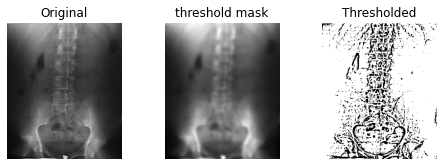

In [ ]:
#adaptative thresholding: gaussian
from skimage.filters import threshold_otsu, threshold_local
image = im
block_size = 15
local_thresh = threshold_local(image, block_size,
                               method= "gaussian", offset =0.01)
binary_local = image > local_thresh


fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2,  adjustable='box')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(local_thresh, cmap=plt.cm.gray)
ax[1].set_title('threshold mask')
ax[1].axis('off')


ax[2].imshow(binary_local, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()
